In [3]:
from __future__ import annotations
try:
    from scripts_for_plotting import *
except ModuleNotFoundError:
    import sys
    sys.path.append('../')
    from scripts_for_plotting import *

In [7]:
# CHANGE NEXT LINE
# output_folder_location: str = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/Aug-20-2024-lbl-all-lines-good" # CHANGE
output_folder_location: str = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/allCN_vmic_6.5_vmac0" # CHANGE
# loads all data from config file and output, config is copied into output folder with name "configuration.txt" from now on
config_dict = load_output_data(output_folder_location)

/media/advait/DATA/research/rcb-project/TSFitPy/plotting_tools/scripts_for_plotting.py:109: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  output_file_df = output_file_df.apply(pd.to_numeric, errors='ignore')


In [8]:
output_results_pd_df = config_dict["output_file_df"]   # Pandas dataframe for your own use
print("Column names are:")
print(output_results_pd_df.columns.values)             # Column names if you want to plot them
output_results_pd_df

Column names are:
['specname' 'wave_center' 'wave_start' 'wave_end'
 'Doppler_Shift_add_to_RV' 'Fe_H' 'N_Fe' 'Microturb' 'Macroturb'
 'rotation' 'chi_squared' 'ew' 'flag_error' 'flag_warning']


,specname,wave_center,wave_start,wave_end,Doppler_Shift_add_to_RV,Fe_H,N_Fe,Microturb,Macroturb,rotation,chi_squared,ew,flag_error,flag_warning
0,HD137613.txt,22587.95,22586.00,22589.9,0.0000,0.0,1.0000,6.5,0.0,0.0,237.310998,14.7735,11000,10011000
1,HD137613.txt,22593.85,22589.90,22597.8,-2.5000,0.0,3.0000,6.5,0.0,0.0,303.823489,285.4261,11000,10011000
2,HD137613.txt,22598.75,22597.50,22600.0,-2.5000,0.0,1.4868,6.5,0.0,0.0,5.921138,262.1940,0,10000000
3,HD137613.txt,22613.80,22611.00,22616.6,-2.2950,0.0,1.4921,6.5,0.0,0.0,7.328247,999.3574,0,0
4,HD137613.txt,22617.20,22616.40,22618.0,-1.5266,0.0,1.3692,6.5,0.0,0.0,10.135765,244.7757,0,0
5,HD137613.txt,22634.00,22631.00,22637.0,-1.1167,0.0,1.4033,6.5,0.0,0.0,9.759951,928.8150,0,0
6,HD137613.txt,22659.40,22656.79,22662.0,-1.5642,0.0,1.4519,6.5,0.0,0.0,6.496622,833.5047,0,0
7,HD137613.txt,22663.50,22662.00,22665.0,-1.8378,0.0,1.4120,6.5,0.0,0.0,3.527484,259.9526,0,0
8,HD137613.txt,22673.40,22672.00,22674.8,-1.3520,0.0,1.4982,6.5,0.0,0.0,5.119169,358.8594,0,0
9,HD137613.txt,22676.40,22675.00,22677.8,-0.9420,0.0,1.4671,6.5,0.0,0.0,5.132404,279.1847,0,0


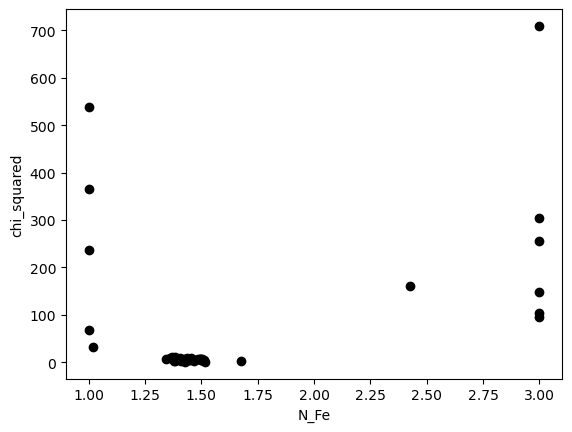

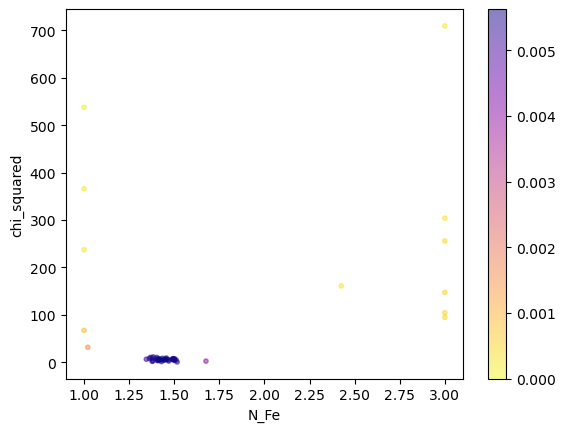

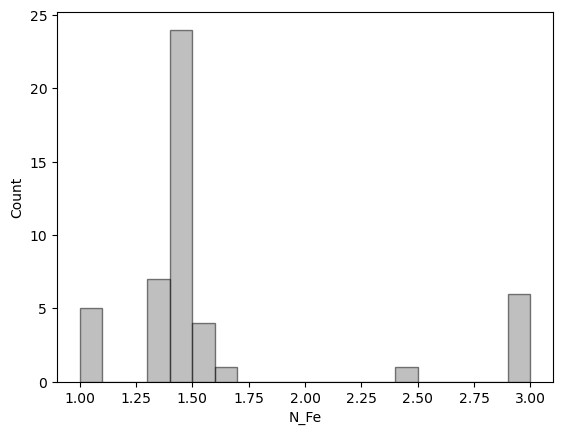

In [9]:
# can plot your own results using column names from the data frame
# can also take any extra arguments just like plt.scatter, example with color='black' is shown below
# can also add e.g. xlim=(-5, 5) or ylim=(-1, 1) for x and y limits
# CHANGE COLUMN NAMES IF NEEDED
plot_scatter_df_results(output_results_pd_df, "N_Fe", "chi_squared", color='black')
# works in similar way, but plots the density map with the desired cmap
# s=10 stands for point size
plot_density_df_results(output_results_pd_df, "N_Fe", "chi_squared", s=10, cmap="plasma_r", alpha=0.5)
# also histogram if needed as well
plot_histogram_df_results(output_results_pd_df, "N_Fe", color='grey', bins=20, alpha=0.5, histtype='bar', ec='black')

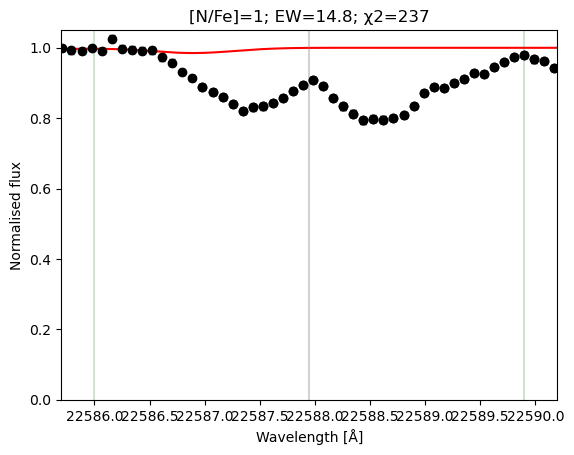

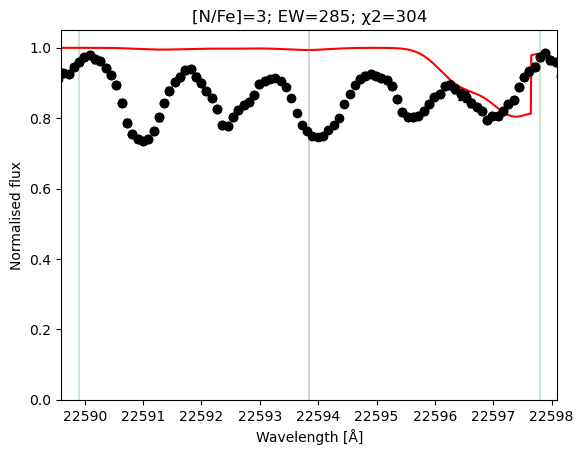

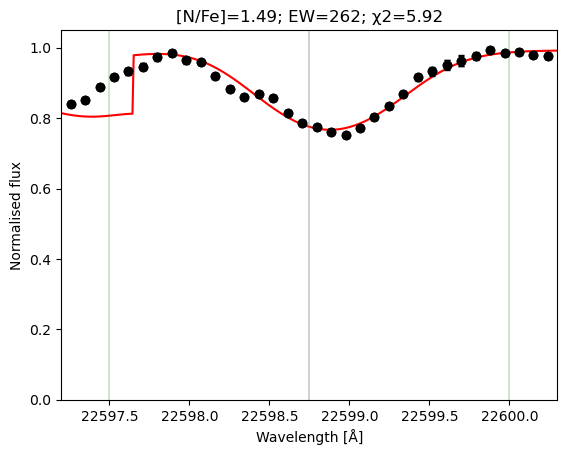

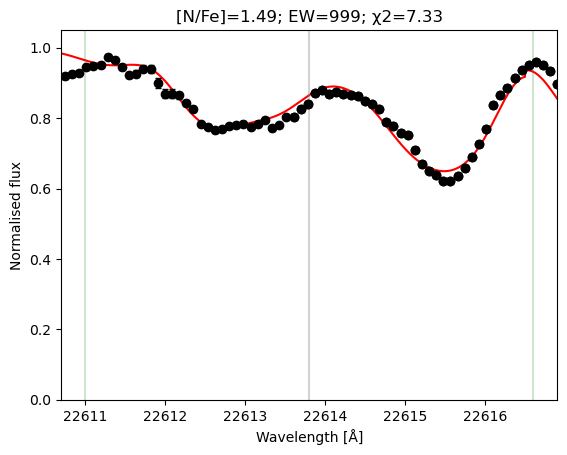

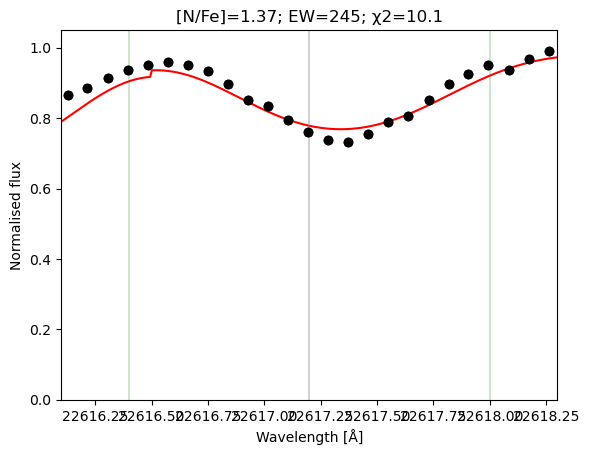

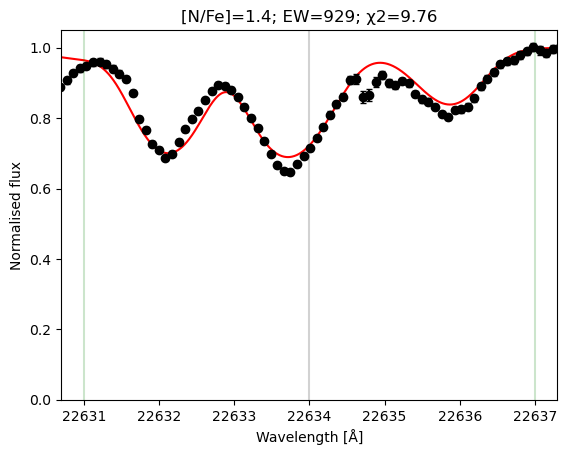

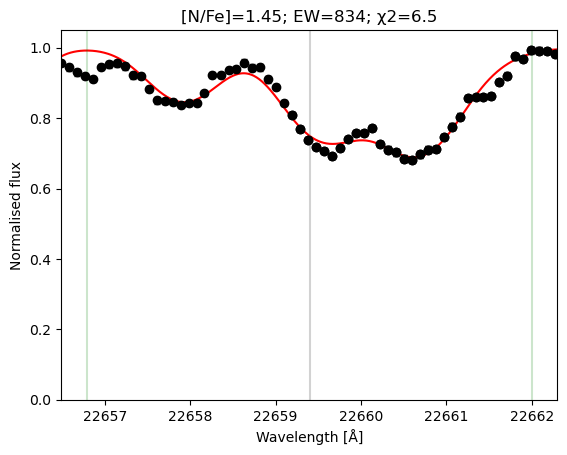

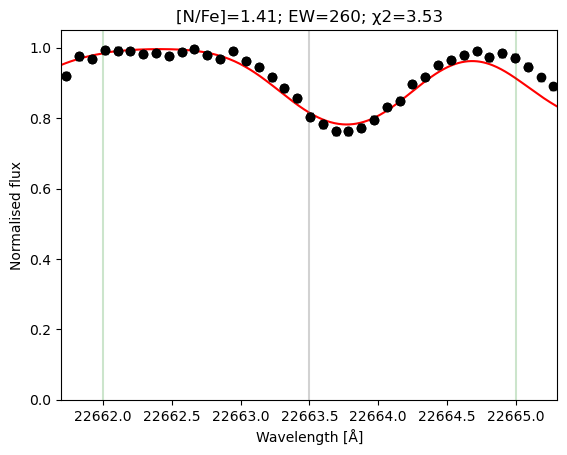

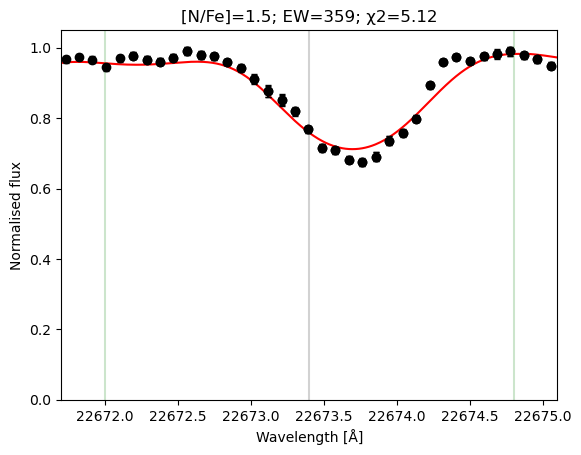

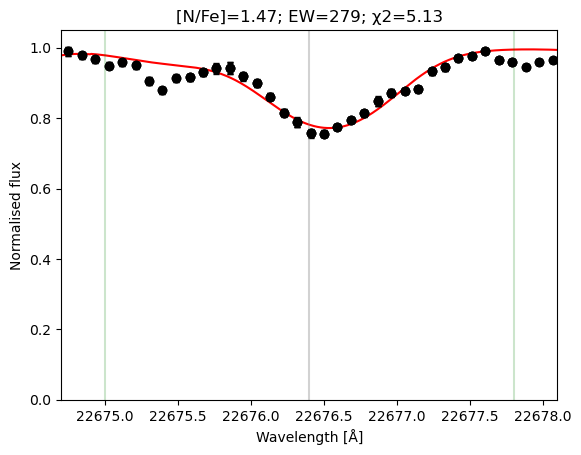

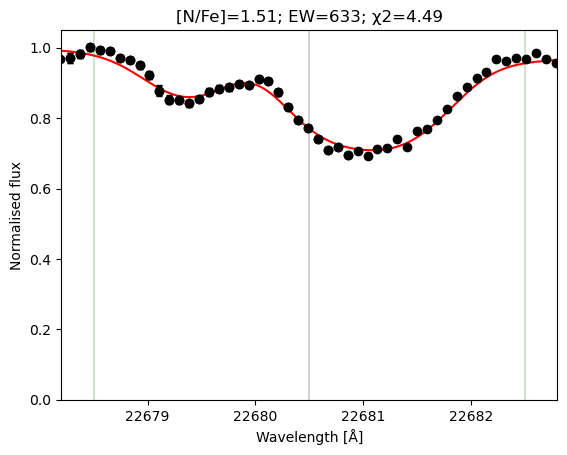

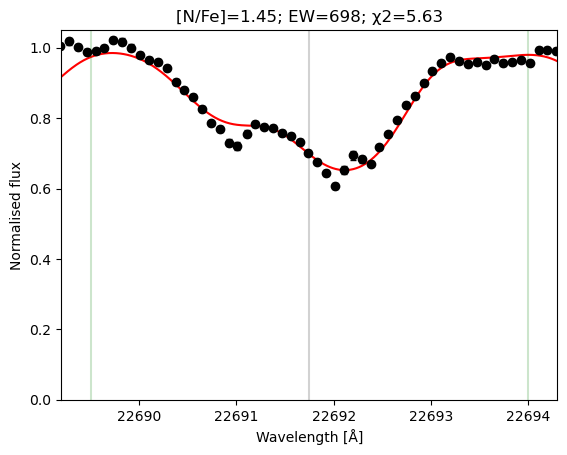

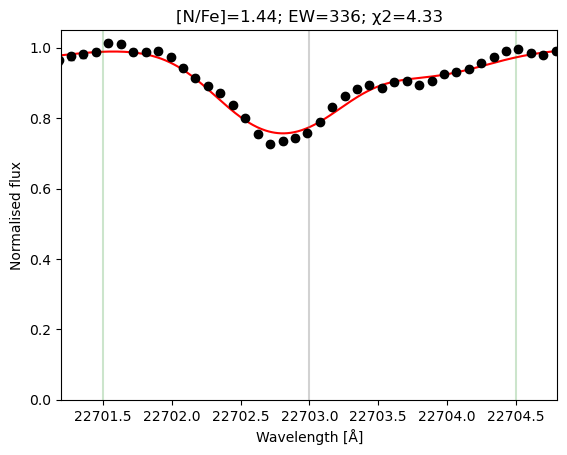

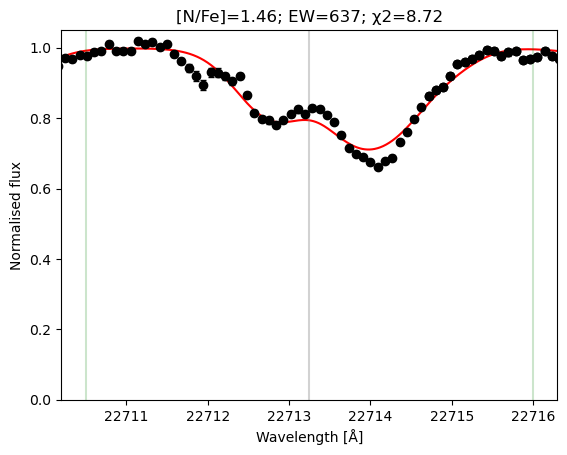

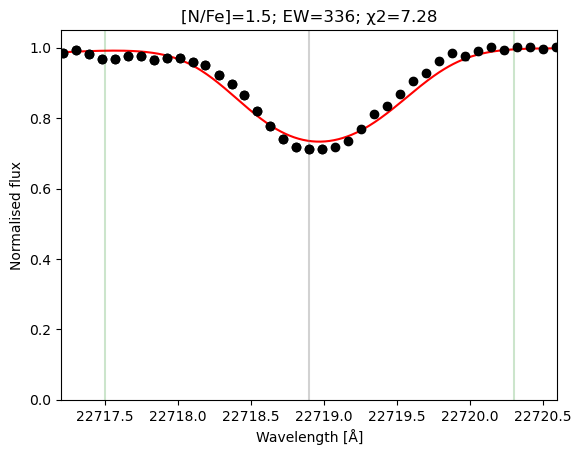

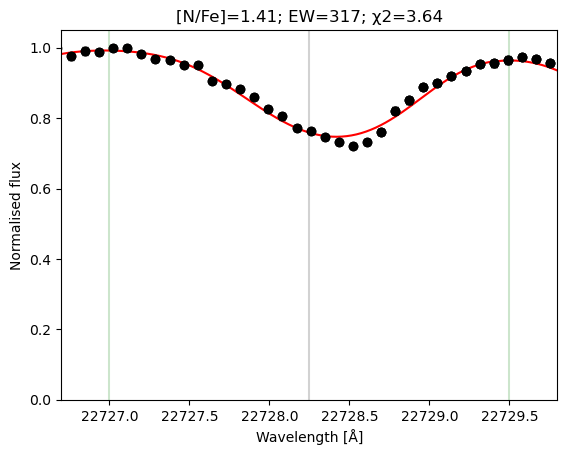

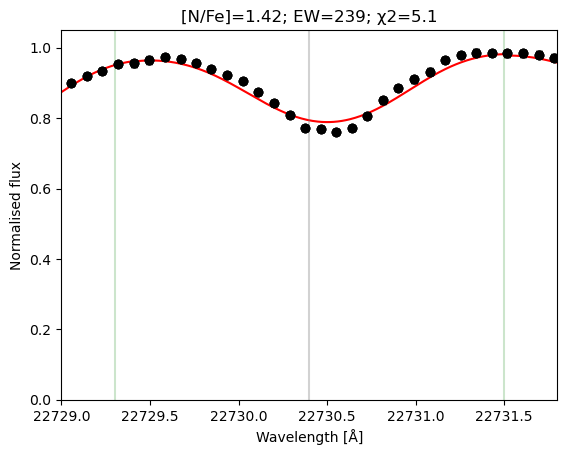

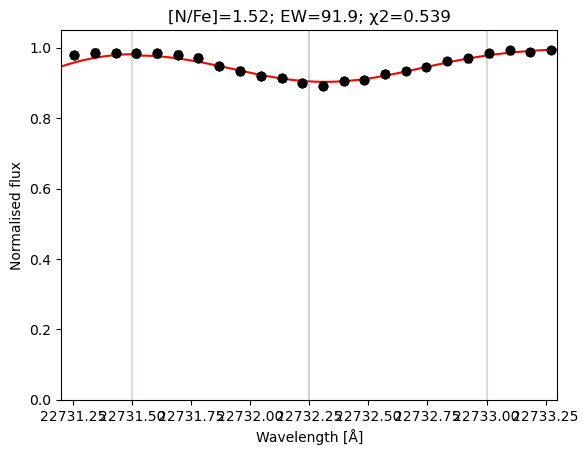

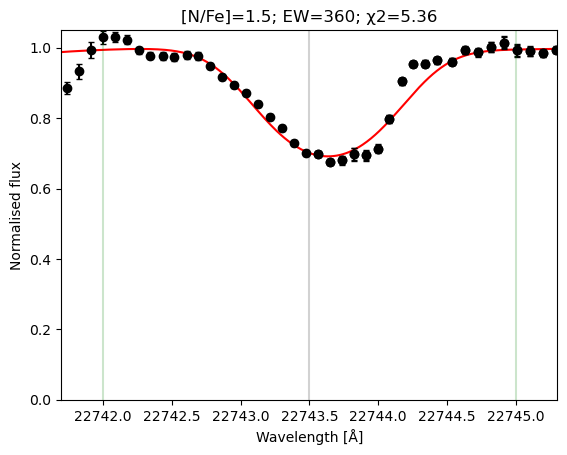

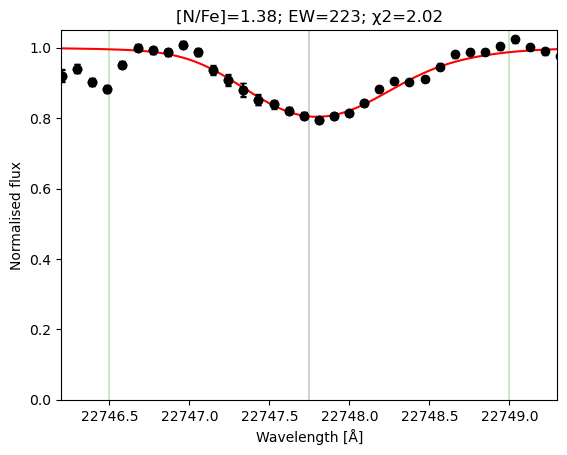

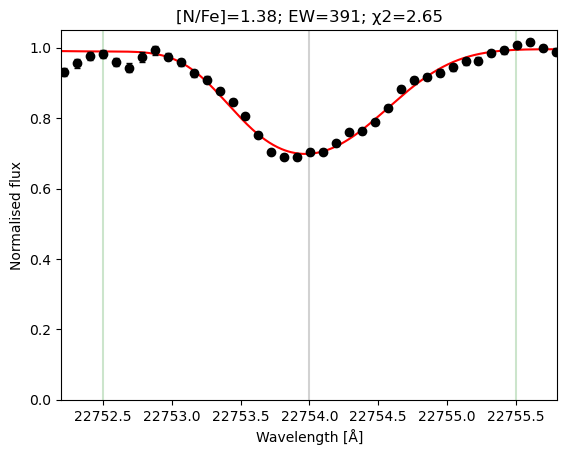

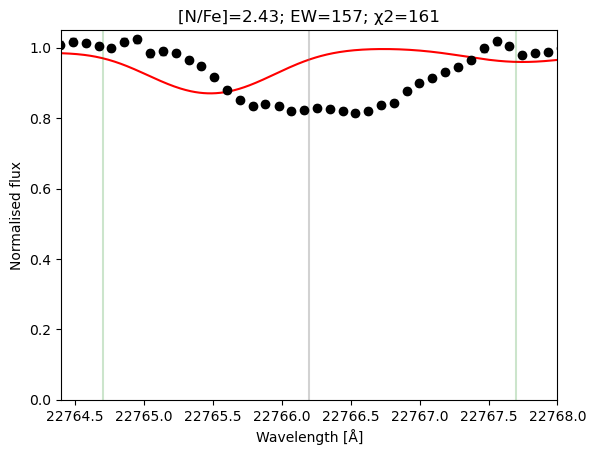

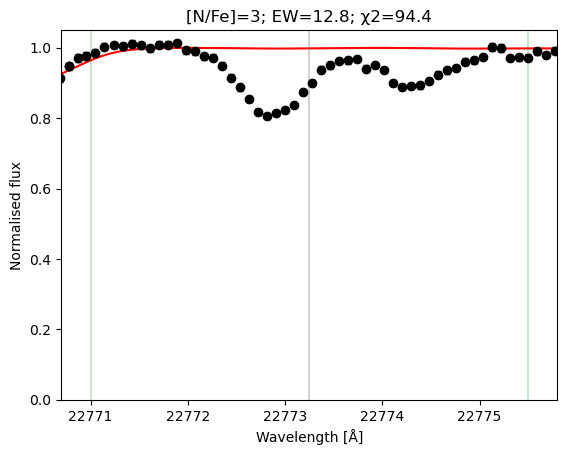

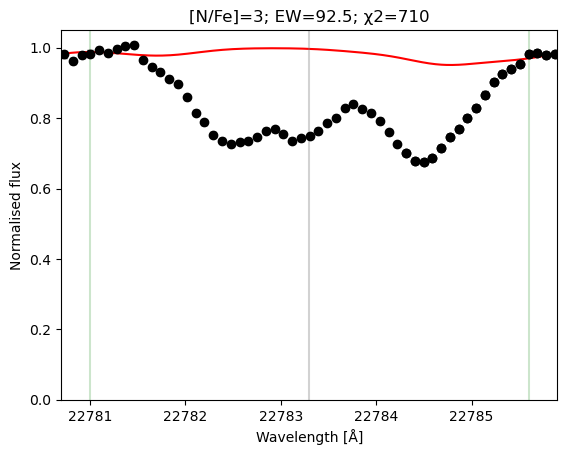

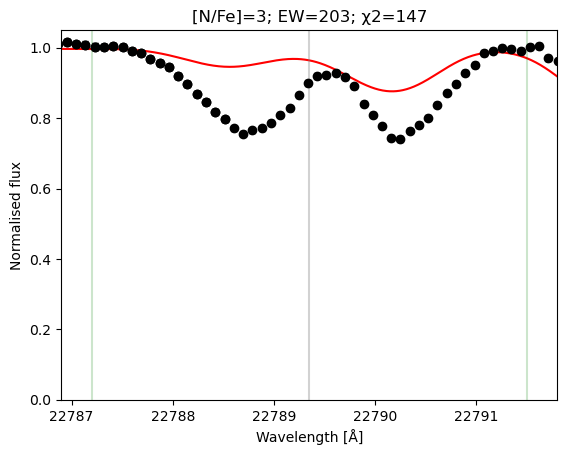

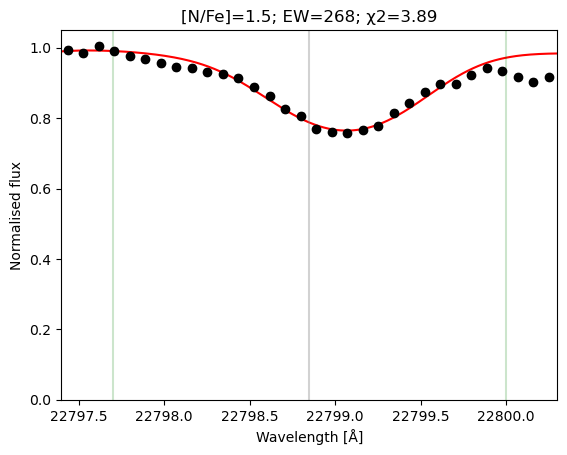

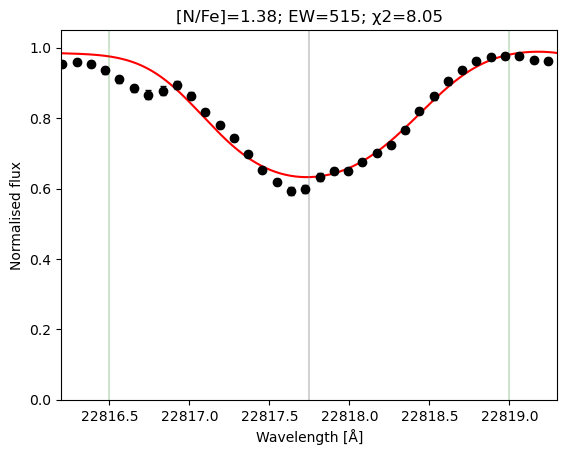

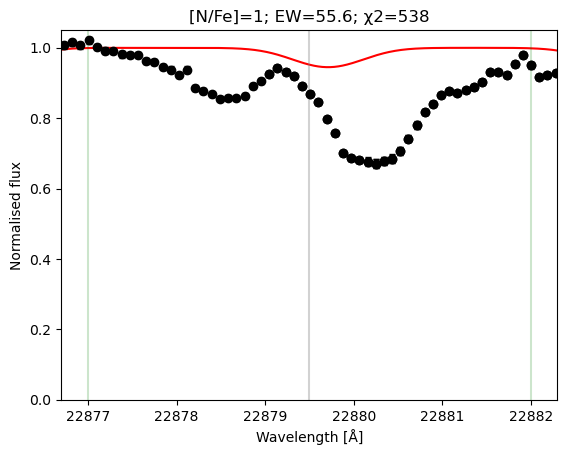

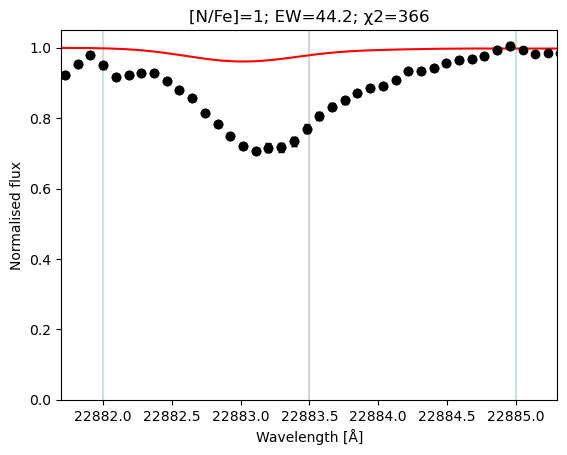

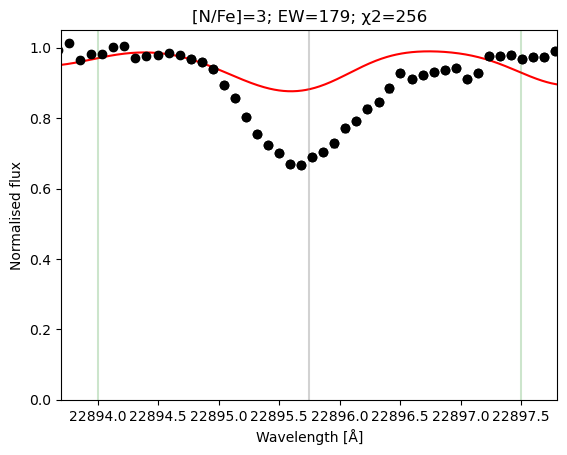

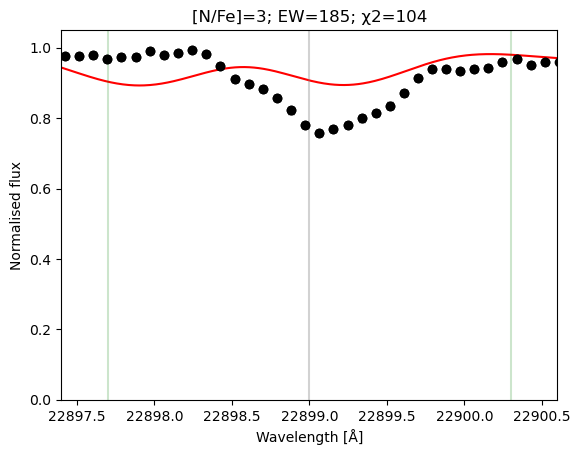

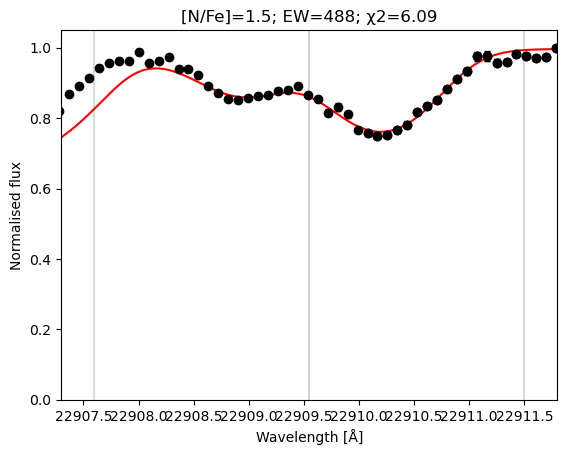

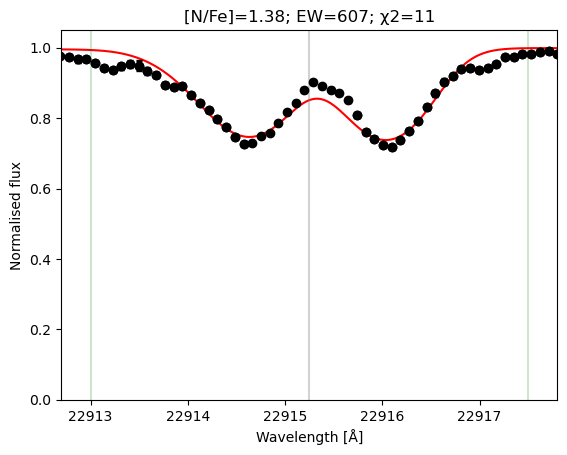

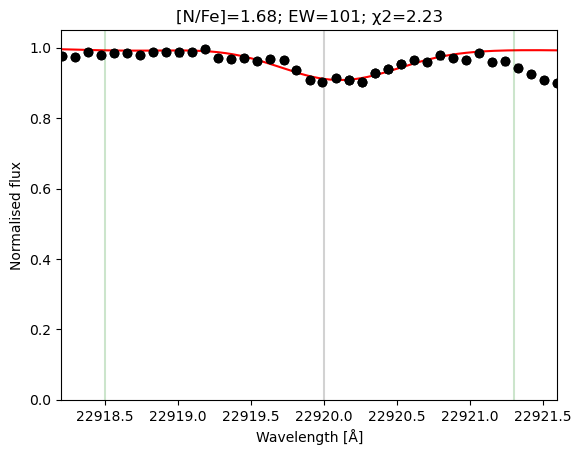

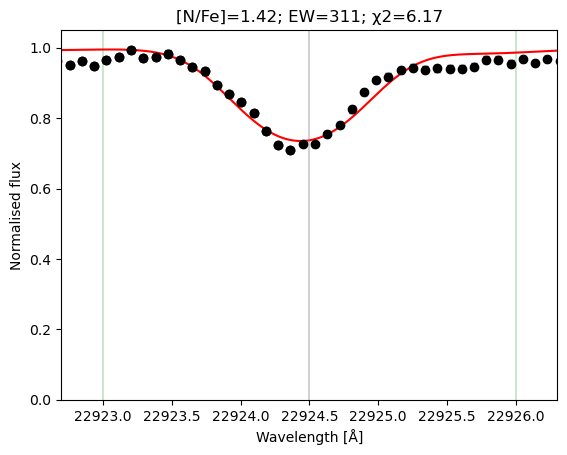

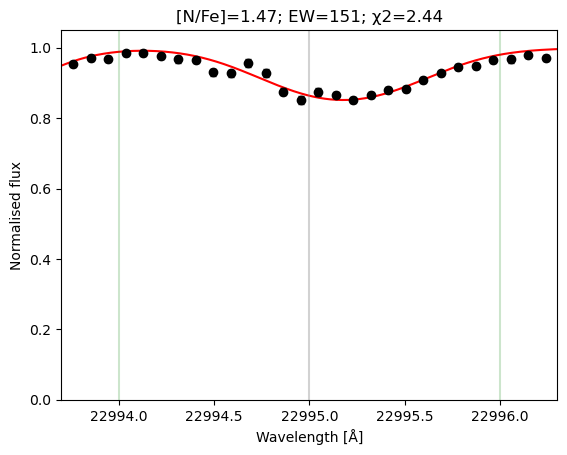

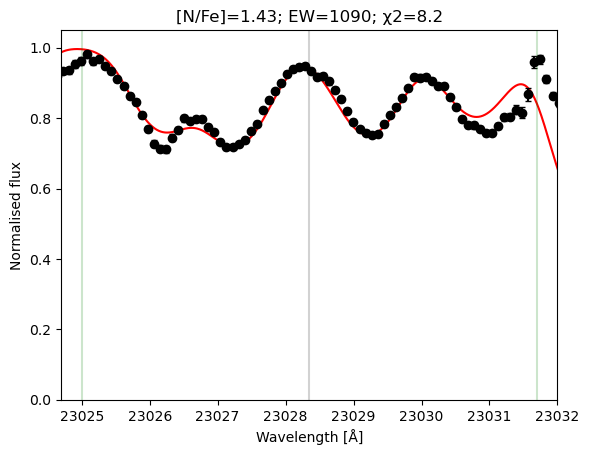

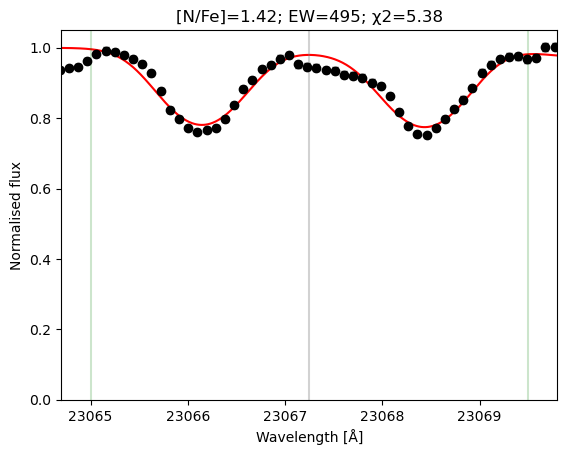

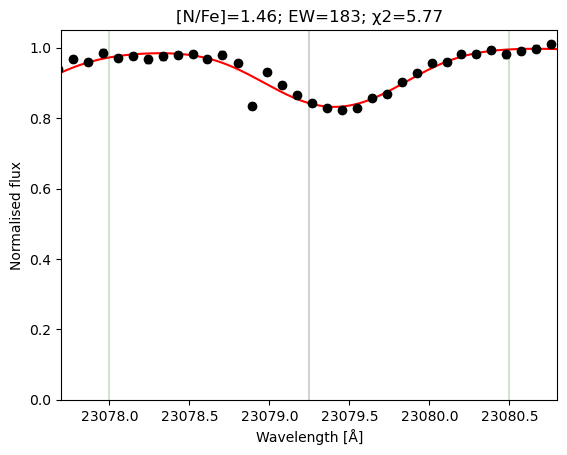

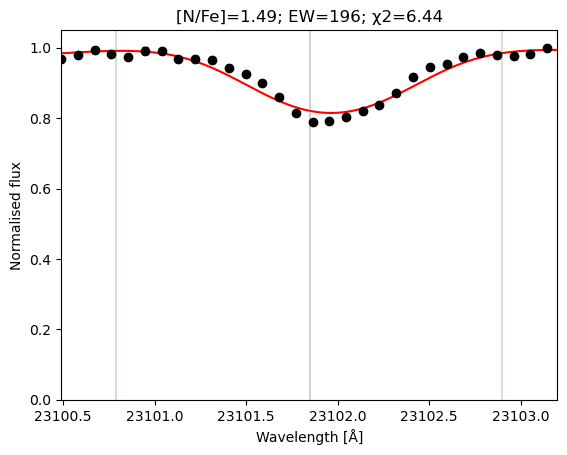

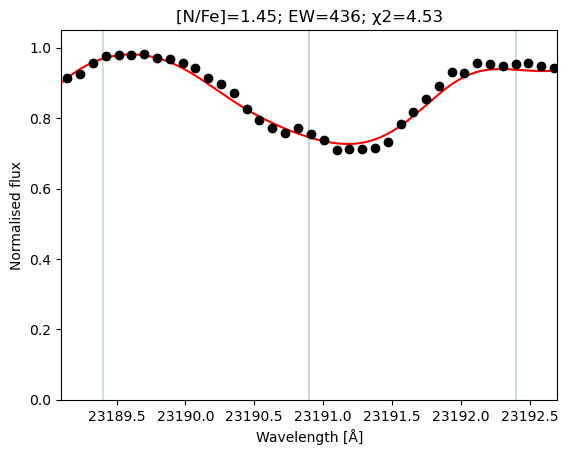

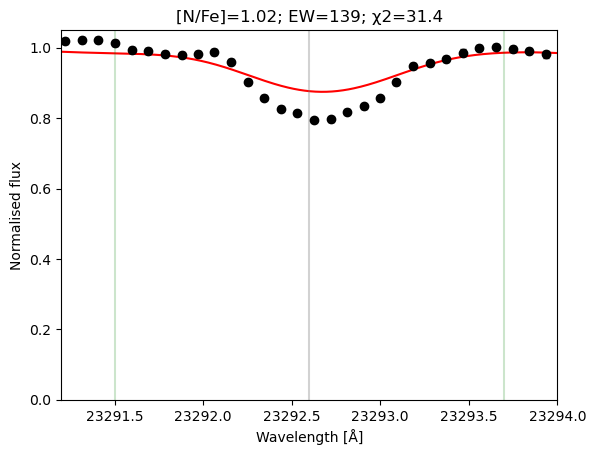

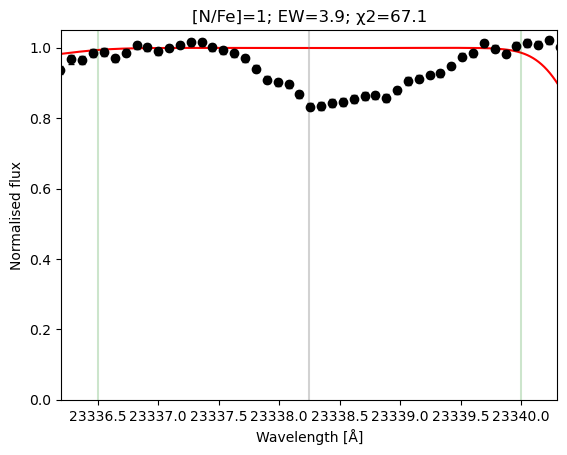

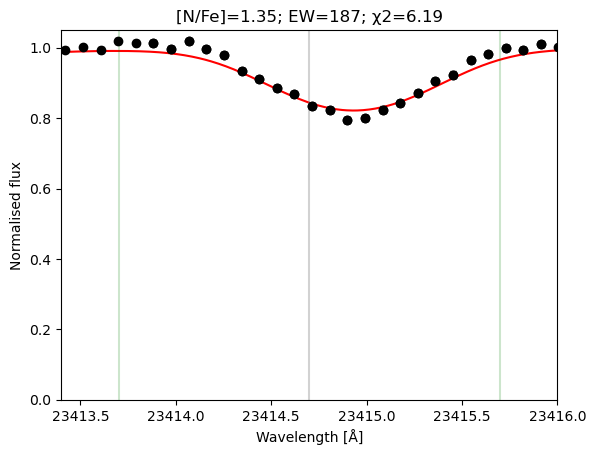

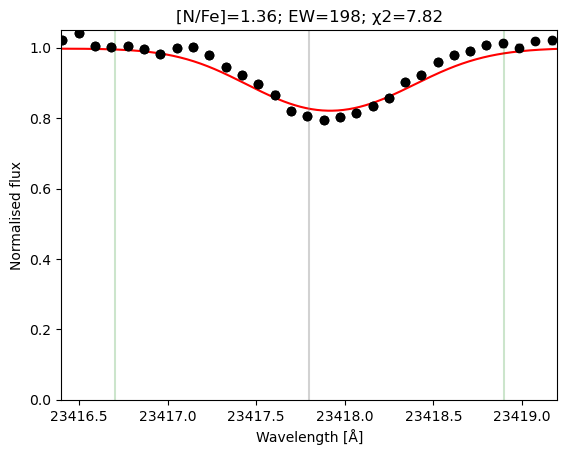

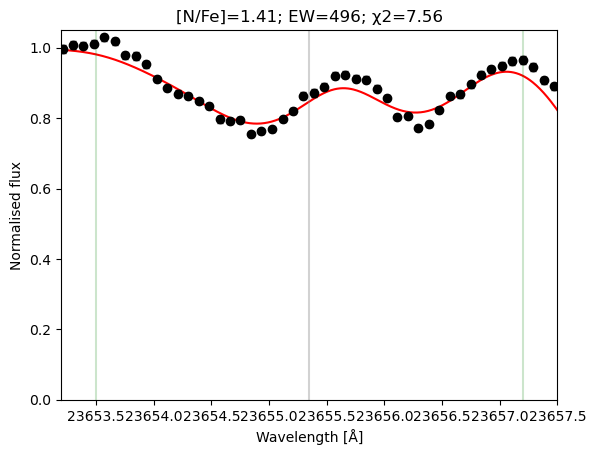

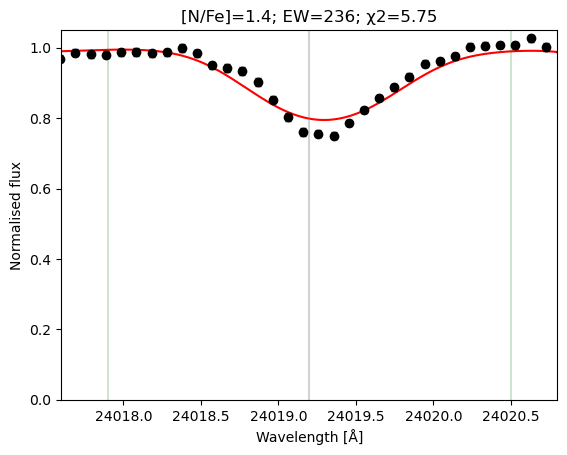

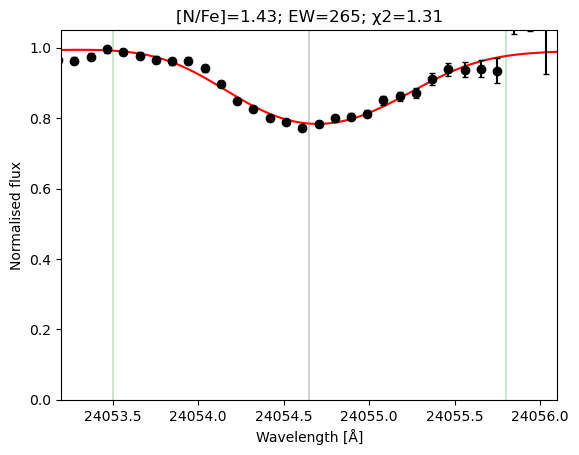

In [5]:
# CHANGE NEXT LINE
star_name_to_plot: str = "HD137613.txt" # CHANGE
# plots all fitted lines for the requested star
wavelength, flux, wavelength_observed_rv, flux_observed = plot_one_star(config_dict, star_name_to_plot, plot_title=True)

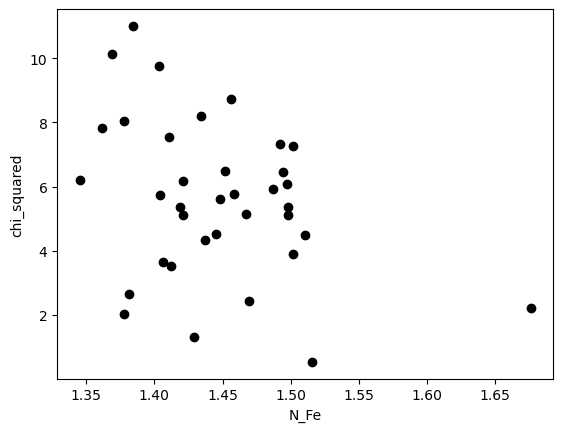

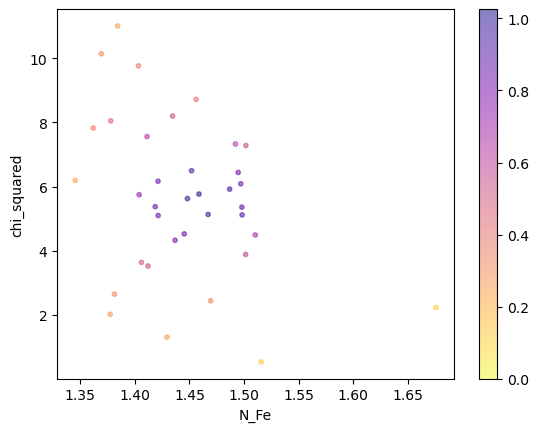

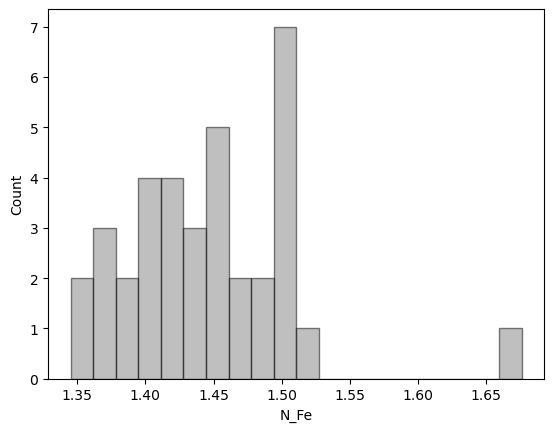

In [8]:
output_trimmed = (output_results_pd_df[output_results_pd_df["chi_squared"] < 20])
output_trimmed = output_trimmed.reset_index(drop=True)
plot_scatter_df_results(output_trimmed, "N_Fe", "chi_squared", color='black')
# works in similar way, but plots the density map with the desired cmap
# s=10 stands for point size
plot_density_df_results(output_trimmed, "N_Fe", "chi_squared", s=10, cmap="plasma_r", alpha=0.5)
# also histogram if needed as well
plot_histogram_df_results(output_trimmed, "N_Fe", color='grey', bins=20, alpha=0.5, histtype='bar', ec='black')

In [7]:
len(output_trimmed)

36

In [6]:
output_trimmed

,specname,wave_center,wave_start,wave_end,Doppler_Shift_add_to_RV,Fe_H,N_Fe,Microturb,Macroturb,rotation,chi_squared,ew,flag_error,flag_warning
0,HD137613.txt,22598.75,22597.50,22600.0,-2.5000,0.0,1.4868,6.5,0.0,0.0,5.921138,262.1940,0,10000000
1,HD137613.txt,22613.80,22611.00,22616.6,-2.2950,0.0,1.4921,6.5,0.0,0.0,7.328247,999.3574,0,0
2,HD137613.txt,22617.20,22616.40,22618.0,-1.5266,0.0,1.3692,6.5,0.0,0.0,10.135765,244.7757,0,0
3,HD137613.txt,22634.00,22631.00,22637.0,-1.1167,0.0,1.4033,6.5,0.0,0.0,9.759951,928.8150,0,0
4,HD137613.txt,22659.40,22656.79,22662.0,-1.5642,0.0,1.4519,6.5,0.0,0.0,6.496622,833.5047,0,0
5,HD137613.txt,22663.50,22662.00,22665.0,-1.8378,0.0,1.4120,6.5,0.0,0.0,3.527484,259.9526,0,0
6,HD137613.txt,22673.40,22672.00,22674.8,-1.3520,0.0,1.4982,6.5,0.0,0.0,5.119169,358.8594,0,0
7,HD137613.txt,22676.40,22675.00,22677.8,-0.9420,0.0,1.4671,6.5,0.0,0.0,5.132404,279.1847,0,0
8,HD137613.txt,22680.50,22678.50,22682.5,-1.3322,0.0,1.5103,6.5,0.0,0.0,4.494188,632.9996,0,0
9,HD137613.txt,22691.75,22689.50,22694.0,-2.5000,0.0,1.4481,6.5,0.0,0.0,5.627171,697.9135,0,10000000


In [7]:
# take weighted mean of N_Fe and weigh by inverse of chi_squared
weighted_mean = np.average(output_trimmed['N_Fe'], weights=1/output_trimmed['chi_squared'])
weighted_mean+7.98

9.443033637558154

In [8]:
# find weighted standard deviation
weighted_std = np.sqrt(np.average((output_trimmed['N_Fe']-weighted_mean)**2, weights=1/output_trimmed['chi_squared']))
weighted_std

0.06876418636242572

In [12]:
np.average(output_trimmed['N_Fe'])+7.98, np.std(output_trimmed['N_Fe'])

(9.4262, 0.06100785923869882)

In [10]:
output_trimmed.sort_values(by='wave_center')

,specname,wave_center,wave_start,wave_end,Doppler_Shift_add_to_RV,Fe_H,N_Fe,Microturb,Macroturb,rotation,chi_squared,ew,flag_error,flag_warning
0,HD137613.txt,22598.75,22597.5,22600.0,-2.5000,0.0,2.0095,1.4788,7.3387,0.0,5.642883,272.0389,0,10000000
1,HD137613.txt,22613.80,22611.0,22616.6,-0.8329,0.0,1.7090,1.4788,5.6009,0.0,4.183067,965.7437,0,0
2,HD137613.txt,22617.20,22616.4,22618.0,-1.6301,0.0,1.7218,1.4788,5.5655,0.0,0.943038,229.7207,0,0
3,HD137613.txt,22634.00,22631.0,22637.0,-1.6843,0.0,1.8263,1.4788,6.5919,0.0,6.589731,946.7054,0,0
4,HD137613.txt,22743.50,22742.0,22745.0,-0.7078,0.0,2.4467,1.4788,6.6622,0.0,6.244230,365.9938,0,0
5,HD137613.txt,22747.75,22746.5,22749.0,-1.9997,0.0,1.6328,1.4788,6.2101,0.0,3.547176,222.6033,0,0
6,HD137613.txt,22754.00,22752.5,22755.5,-2.5000,0.0,1.8286,1.4788,6.9849,0.0,1.546315,400.1400,0,10000000
7,HD137613.txt,22798.85,22797.7,22800.0,-1.0611,0.0,2.0925,1.4788,8.0245,0.0,1.220231,280.7120,0,0
8,HD137613.txt,22817.75,22816.5,22819.0,-1.9466,0.0,1.9088,1.4788,6.7955,0.0,4.648611,526.6145,0,0
9,HD137613.txt,22909.55,22907.6,22911.5,-0.4602,0.0,1.6810,1.4788,6.8157,0.0,2.476006,458.1570,0,0


In [10]:
import scienceplots
plt.style.use(['science', 'notebook'])

Text(0, 0.5, '[N/Fe]')

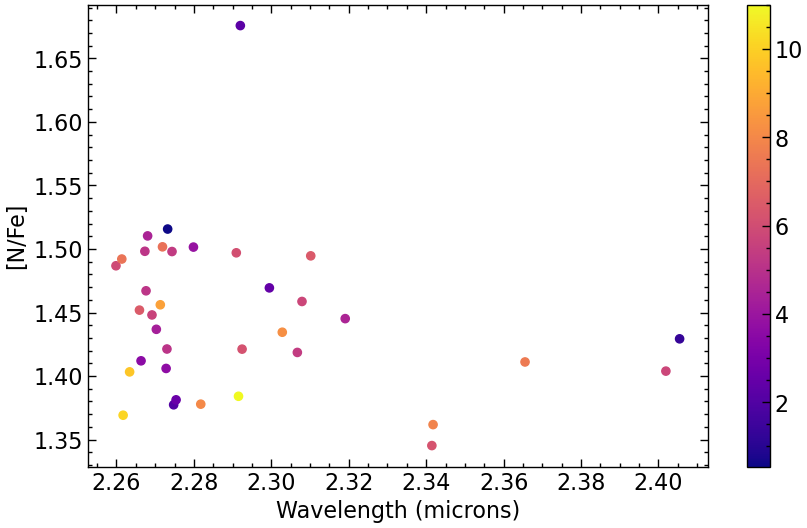

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(output_trimmed['wave_center']*1e-4, output_trimmed['N_Fe'], c=output_trimmed['chi_squared'], cmap = 'plasma', s=35)
plt.colorbar()
plt.xlabel('Wavelength (microns)')
plt.ylabel('[N/Fe]')
# plt.xlim(2.263627, 2.3455225)
# plt.ylim(1.41894,2.51806)

In [18]:
 output_trimmed['N_Fe']

0    2.2992
1    1.8464
2    1.6924
3    1.7549
4    1.9784
5    1.7927
6    1.8119
7    2.0430
8    1.5588
9    1.5296
Name: N_Fe, dtype: float64

Trimming
Trimming done
Running TS
['s5500_g+0.5_m1.0_t02_st_z+0.00_a+0.00_c+0.00_n+0.00_o+0.00_r+0.00_s+0.00.mod', 's5500_g+0.5_m1.0_t02_st_z+0.00_a+0.00_c+0.00_n+0.00_o+0.00_r+0.00_s+0.00.mod', 's5500_g+0.5_m1.0_t02_st_z+0.00_a+0.00_c+0.00_n+0.00_o+0.00_r+0.00_s+0.00.mod', 's5500_g+0.5_m1.0_t02_st_z+0.00_a+0.00_c+0.00_n+0.00_o+0.00_r+0.00_s+0.00.mod', 's5500_g+0.5_m1.0_t02_st_z+0.00_a+0.00_c+0.00_n+0.00_o+0.00_r+0.00_s+0.00.mod', 's5500_g+0.5_m1.0_t02_st_z+0.00_a+0.00_c+0.00_n+0.00_o+0.00_r+0.00_s+0.00.mod', 's5500_g+0.5_m1.0_t02_st_z+0.00_a+0.00_c+0.00_n+0.00_o+0.00_r+0.00_s+0.00.mod', 's5500_g+0.5_m1.0_t02_st_z+0.00_a+0.00_c+0.00_n+0.00_o+0.00_r+0.00_s+0.00.mod']
 *****************************
 * begining of interpolation *
 *****************************
 Interpolation between :
  this model is SPHERICALLY SYMMETRIC
 AAAA
 s5500g0.5z+0.00m1.0t05ptiply                      
model 1  Teff=   5500.  logg= 0.50  z=  0.00
  this model is SPHERICALLY SYMMETRIC
 AAAA
 s5500g0.5z+0.00m1.0t0

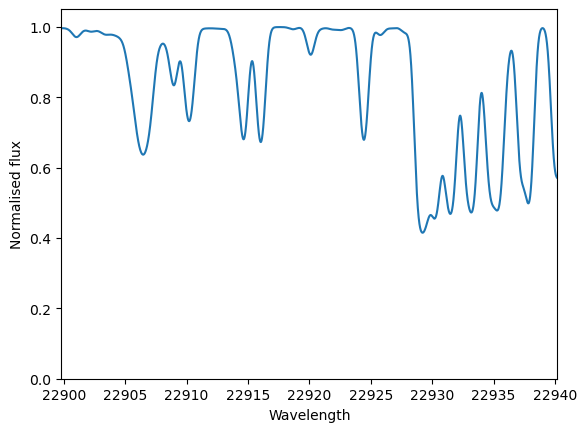

In [13]:
from __future__ import annotations
try:
    from scripts_for_plotting import *
except ModuleNotFoundError:
    import sys
    sys.path.append('../')
    from scripts_for_plotting import *

turbospectrum_paths = {"turbospec_path": "../turbospectrum/exec-ifx/",  # change to /exec-gf/ if gnu compiler
                       "interpol_path": "../scripts/model_interpolators/",
                       "model_atom_path": "../input_files/nlte_data/model_atoms/",
                       "departure_file_path": "../input_files/nlte_data/",
                    #    "model_atmosphere_grid_path": "../input_files/test_model_atmospheres/",
                        "model_atmosphere_grid_path": "../input_files/hdc_model_atmospheres/",
                       "line_list_path": "../input_files/linelists/linelist_5500K/"}

teff = 5500.0
logg = 0.5
met = 0.0
vmic = 4.0
lmin = 22900
lmax = 22940
ldelta = 0.01
atmosphere_type = "1D"   # "1D" or "3D"
nlte_flag = False
elements_in_nlte = ["Fe", "Mg"]  # can choose several elements, used ONLY if nlte_flag = True
element_abundances ={"H" : 7.5-12, "He" : 11.5-10.9-0.3, "C" : 9.5-8.46-0.1, "N" : 9.4-7.83-0.15, "O" : 8.8-8.69-0.08, "Na" : 6.9-6.22}  # elemental abundances [X/Fe]; if not written solar scaled ones are used
include_molecules = True  # way faster without them

# plots the data, but can also save it for later use
wavelength, flux = plot_synthetic_data(turbospectrum_paths, teff, logg, met, vmic, lmin, lmax, ldelta, atmosphere_type, nlte_flag, elements_in_nlte, element_abundances, include_molecules, resolution=50000, macro=0, rotation=0, verbose=True)
# /home/advait/Desktop/research/rcb-project/TSFitPy/input_files/hdc_model_atmospheres/1D/s5500_g+0.5_m1.0_t02_st_z+0.00_a+0.00_c+0.00_n+0.00_o+0.00_r+0.00_s+0.00.mod